<a href="https://colab.research.google.com/github/matasoy/turkceplakaoku/blob/main/Plaka_Tanima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Yeni Bölüm

In [2]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 3s (1,673 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [3]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import cv2
from google.colab.patches import cv2_imshow
import pytesseract
import imutils
import numpy as np
import os
from google.colab import files
from IPython.display import Image
import re

In [5]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


Plaka Numarası: aar01AEV207


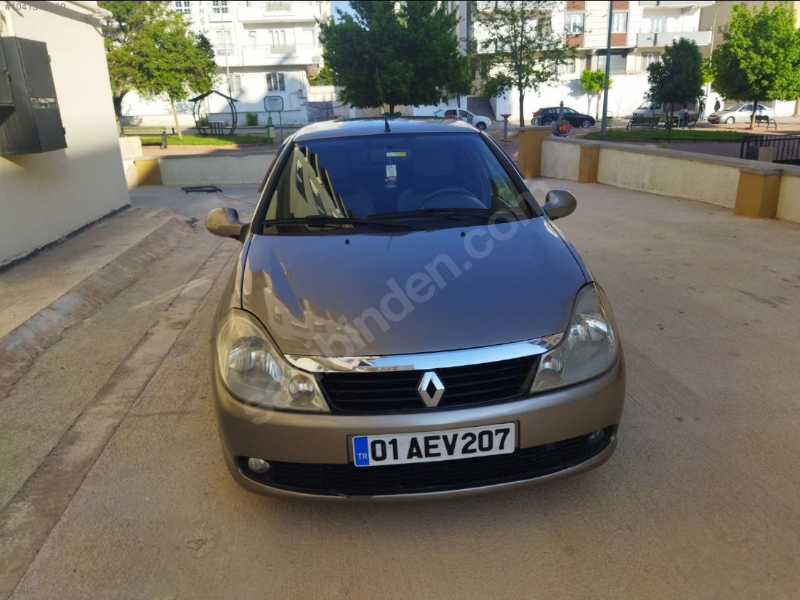

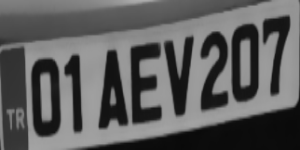

In [6]:
dosya = r'/content/drive/MyDrive/x19.jpg'
res = cv2.imread(dosya,cv2.IMREAD_COLOR)
dim = (1600, 1200)
img=cv2.resize(res, dim)



gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
gray = cv2.bilateralFilter(gray, 13, 15, 15) 

edged = cv2.Canny(gray, 30, 200) 
contours = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]
screenCnt = None

for c in contours:
    
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * peri, True)
 
    if len(approx) == 4:
        screenCnt = approx
        break

if screenCnt is None:
    detected = 0
    print("No contour detected")
else:
     detected = 1

if detected == 1:
    cv2.drawContours(img, [screenCnt], -1, (0, 0, 255), 3)

mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[screenCnt],0,255,-1)
new_image = cv2.bitwise_and(img,img,mask=mask)

(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
Cropped = gray[topx:bottomx+1, topy:bottomy+1]

text = pytesseract.image_to_string(Cropped, config=r'--oem 3 --psm 6')

print("Plaka Numarası:",re.sub(r'[^\w]', ' ', text).replace(" ", ""))
dim2 = (800, 600)
img = cv2.resize(res,dim2)
Cropped = cv2.resize(Cropped,(300,150))
cv2_imshow(img)
cv2_imshow(Cropped)

cv2.waitKey(0)
cv2.destroyAllWindows()